#📌 Extracão

# Extração dos dados e criação do dataframe

In [54]:
#Extração dos dados do arquivo json
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/everthonsouza/desafio-alura-telecomx-python/refs/heads/main/TelecomX_Data.json'
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" }

response = requests.get(url, headers=headers)

dados = pd.read_json(StringIO(response.text))
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [55]:
# analise do dataframe
print('Linhas:', dados.shape[0], '- Colunas:', dados.shape[1])

# listando as colunas
print('\nColunas:', list(dados.columns))

print('\nInformações das colunas, tipos de dados e registros:\n')
dados.info()

Linhas: 7267 - Colunas: 6

Colunas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Informações das colunas, tipos de dados e registros:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Analise prévia do conteudo de cada uma das colunas

In [56]:
dados['customer'][0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [57]:
dados['phone'][0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [58]:
dados['internet'][0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [59]:
dados['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [60]:
# colunas relevantes para analise
print('Churn')
print('customer.SeniorCitizen')
print('customer.Partner')
print('customer.Dependents')
print('customer.tenure')
print('phone.PhoneService')
print('phone.MultipleLines')
print('internet.InternetService')
print('internet.OnlineSecurity')
print('internet.OnlineBackup')
print('internet.DeviceProtection')
print('internet.TechSupport')
print('internet.StreamingTV')
print('internet.StreamingMovies')
print('account.Contract')
print('account.PaperlessBilling')
print('account.PaymentMethod')
print('account.Charges.Monthly')
print('account.Charges.Total')

Churn
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges.Monthly
account.Charges.Total


#🔧 Transformação

# Analise dos dados de cada coluna, validando se possuem dados nulos/vazios e/ou inconsistentes

In [61]:
# sem dados não definidos
dados.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [62]:
# sem dados nulos
dados.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [63]:
print(pd.json_normalize(dados['customer']).isna().sum())
print(pd.json_normalize(dados['customer']).eq('').sum())

gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64


In [64]:
print(pd.json_normalize(dados['phone']).isna().sum())
print(pd.json_normalize(dados['phone']).eq('').sum())

PhoneService     0
MultipleLines    0
dtype: int64
PhoneService     0
MultipleLines    0
dtype: int64


In [65]:
print(pd.json_normalize(dados['internet']).isna().sum())
print(pd.json_normalize(dados['internet']).eq('').sum())

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [66]:
print(pd.json_normalize(dados['account']).isna().sum())
print(pd.json_normalize(dados['account']).eq('').sum())

Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [67]:
# validando que não possuem clientes duplicados
print('Quantidade de clientes:', dados['customerID'].count())
print('Quantidade de clientes distintos:', len(dados['customerID'].unique()))

Quantidade de clientes: 7267
Quantidade de clientes distintos: 7267


In [68]:
# validando a integridade da coluna 'Churn'
print('Conteudo distinto da coluna Churn', dados['Churn'].unique())

# coluna 'Churn' possui valores vazios
dados.eq('').sum()

Conteudo distinto da coluna Churn ['No' 'Yes' '']


,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [69]:
# removendo os registros onde o valor de 'Churn' é uma string vazia
dados.query('Churn == ""')

,customerID,Churn,customer,phone,internet,account
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
...,...,...,...,...,...,...
7158,9840-GSRFX,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7180,9872-RZQQB,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7211,9920-GNDMB,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7239,9955-RVWSC,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [70]:
# removendo os registros onde o valor de 'Churn' é uma string vazia
linhas_excluir = dados.query('Churn == ""').index

# axis=0 => remoção de linhas
dados.drop(linhas_excluir, axis=0, inplace=True)

In [71]:
# revalidando os dados
dados.eq('').sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [72]:
# resetando o index devido exclusão de registros
# inplace=True => atribui as alterações ao dataframe
# drop=True => não mantem a coluna com os indices antigos
dados.reset_index(drop=True, inplace=True)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7038,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7039,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7040,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7041,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Normalizando os dicionarios em dataframes

In [73]:
dados_inicial = dados[['customerID', 'Churn']]
dados_inicial

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7038,9987-LUTYD,No
7039,9992-RRAMN,Yes
7040,9992-UJOEL,No
7041,9993-LHIEB,No


In [74]:
dados_customer = pd.json_normalize(dados['customer'])
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7038,Female,0,No,No,13
7039,Male,0,Yes,No,22
7040,Male,0,No,No,2
7041,Male,0,Yes,Yes,67


In [75]:
dados_phone = pd.json_normalize(dados['phone'])
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7038,Yes,No
7039,Yes,Yes
7040,Yes,No
7041,Yes,No


In [76]:
dados_internet = pd.json_normalize(dados['internet'])
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7038,DSL,Yes,No,No,Yes,No,No
7039,Fiber optic,No,No,No,No,No,Yes
7040,DSL,No,Yes,No,No,No,No
7041,DSL,Yes,No,Yes,Yes,No,Yes


In [77]:
dados_account = pd.json_normalize(dados['account'])
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7038,One year,No,Mailed check,55.15,742.9
7039,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,Month-to-month,Yes,Mailed check,50.30,92.75
7041,Two year,No,Mailed check,67.85,4627.65


In [78]:
# realizando o merge dos dataframes
dados_normalizados = dados_inicial.join([dados_customer, dados_phone, dados_internet, dados_account], how='inner')
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [79]:
# nova checagem dos dados
print(dados_normalizados.isna().sum())
print(dados_normalizados.eq('').sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


# Normalizando e padronizando os dados

In [80]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [81]:
# padronizando a coluna "churn"
import numpy as np

# validando a substituição dos dados
print(dados_normalizados.query('Churn == "Yes"')['Churn'].count())
print(dados_normalizados['Churn'].apply(lambda x: str(x).lower() == 'yes' if 1 else 0).astype(np.int64).sum())

1869
1869


In [82]:
# padronizando a coluna "churn"
dados_normalizados['Churn'] = dados_normalizados['Churn'].apply(lambda x: str(x).lower() == 'yes' if 1 else 0).astype(np.int64)
dados_normalizados.info()
dados_normalizados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [83]:
# padronizando as demais colunas boleanas
colunas_boolean = ['Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'OnlineBackup',	'DeviceProtection', 'OnlineSecurity',
                   'TechSupport', 'StreamingTV',	'StreamingMovies', 'PaperlessBilling']

dados_normalizados[colunas_boolean] = dados_normalizados[colunas_boolean].applymap(lambda x: str(x).lower() == 'yes' if 1 else 0).astype(np.int64)
dados_normalizados.info()
dados_normalizados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


<ipython-input-83-fe573ead0b67>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dados_normalizados[colunas_boolean] = dados_normalizados[colunas_boolean].applymap(lambda x: str(x).lower() == 'yes' if 1 else 0).astype(np.int64)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [84]:
# Analisando as demais colunas não numéricas

colunas_nao_numericas = []
for coluna in list(dados_normalizados.columns):
  if dados_normalizados[coluna].dtype == 'object':
    colunas_nao_numericas.append(coluna)

dados_normalizados[colunas_nao_numericas].head()

,customerID,gender,InternetService,Contract,PaymentMethod,Charges.Total
0,0002-ORFBO,Female,DSL,One year,Mailed check,593.3
1,0003-MKNFE,Male,DSL,Month-to-month,Mailed check,542.4
2,0004-TLHLJ,Male,Fiber optic,Month-to-month,Electronic check,280.85
3,0011-IGKFF,Male,Fiber optic,Month-to-month,Electronic check,1237.85
4,0013-EXCHZ,Female,Fiber optic,Month-to-month,Mailed check,267.4


In [85]:
# tratando a coluna "Charges.Total"

print(dados_normalizados['Charges.Total'].eq('').sum())
print(dados_normalizados['Charges.Total'].eq(' ').sum())

# coluna possui espaços vazios, necessario substituir por zero
dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].apply(lambda x: str(x).replace(' ', '0').replace(',', '')).astype(np.float64)

dados_normalizados.info()

0
11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   obj

In [86]:
# Renomeando as colunas para melhor visualização e entendimento
dados_normalizados.rename(columns={
    'customerID': 'Cliente_ID',
    'gender': 'Genero',
    'SeniorCitizen': 'Eh_Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Possui_Telefone',
    'MultipleLines': 'Possui_Varias_Linhas',
    'InternetService': 'Possui_Internet',
    'OnlineSecurity': 'Possui_Seguranca_Online',
    'OnlineBackup': 'Possui_Backup',
    'DeviceProtection': 'Possui_Protecao',
    'TechSupport': 'Possui_Suporte_TV',
    'StreamingTV': 'Possui_TV_Cabo',
    'StreamingMovies': 'Possui_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Forma_Pagamento',
    'Charges.Monthly': 'Total_Mes',
    'Charges.Total': 'Total_Gasto',
}, inplace=True)

dados_normalizados.head()

,Cliente_ID,Churn,Genero,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Internet,...,Possui_Backup,Possui_Protecao,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mes,Total_Gasto
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [87]:
# criação da coluna com o custo/valor diario do serviço prestado
dados_normalizados['Custo_Diario'] = (round(dados_normalizados['Total_Mes'] / 30, 2)).astype(np.float64)
dados_normalizados.head()

,Cliente_ID,Churn,Genero,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Internet,...,Possui_Protecao,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mes,Total_Gasto,Custo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga e análise

# Análise Descritiva

In [88]:
# Dados do tempo de contrato
print('Média do tempo de contrato (meses):', round(np.mean(dados_normalizados['Meses_Contrato'])))
print('Mediana do tempo de contrato (meses):', round(np.median(dados_normalizados['Meses_Contrato'])))
print('Desvio padrão do tempo de contrato (meses):', round(np.std(dados_normalizados['Meses_Contrato'])))
print('Tempo máximo de contrato (meses):', np.max(dados_normalizados['Meses_Contrato']))
print('Tempo mínimo de contrato (meses):', np.min(dados_normalizados['Meses_Contrato']))

Média do tempo de contrato (meses): 32
Mediana do tempo de contrato (meses): 29
Desvio padrão do tempo de contrato (meses): 25
Tempo máximo de contrato (meses): 72
Tempo mínimo de contrato (meses): 0


In [89]:
# Dados do custo/gasto do serviço -> Total_Mes
print('Média do custo do serviço (R$):', round(np.mean(dados_normalizados['Total_Mes']), 2))
print('Mediana do custo do serviço (R$):', round(np.median(dados_normalizados['Total_Mes']), 2))

Média do custo do serviço (R$): 64.76
Mediana do custo do serviço (R$): 70.35


In [90]:
# Dados do perfil do cliente
print('Quantidade de clientes do sexo feminino:', dados_normalizados.query('Genero == "Female"')['Cliente_ID'].count())
print('Quantidade de clientes do sexo masculino:', dados_normalizados.query('Genero == "Male"')['Cliente_ID'].count())
print('Quantidade de clientes idosos:', dados_normalizados['Eh_Idoso'].sum())
print('Quantidade de clientes que possuem parceiros(as):', dados_normalizados['Possui_Parceiro'].sum())
print('Quantidade de clientes que possuem dependentes:', dados_normalizados['Possui_Dependentes'].sum())

Quantidade de clientes do sexo feminino: 3488
Quantidade de clientes do sexo masculino: 3555
Quantidade de clientes idosos: 1142
Quantidade de clientes que possuem parceiros(as): 3402
Quantidade de clientes que possuem dependentes: 2110


# Análise do Churn dos clientes

In [91]:
# Analise do churn
print('Total de clientes evadidos:', dados_normalizados['Churn'].sum())
print('Percentual de clientes evadidos (%):',  round(dados_normalizados['Churn'].sum() / dados_normalizados['Churn'].count() * 100, 2))

Total de clientes evadidos: 1869
Percentual de clientes evadidos (%): 26.54


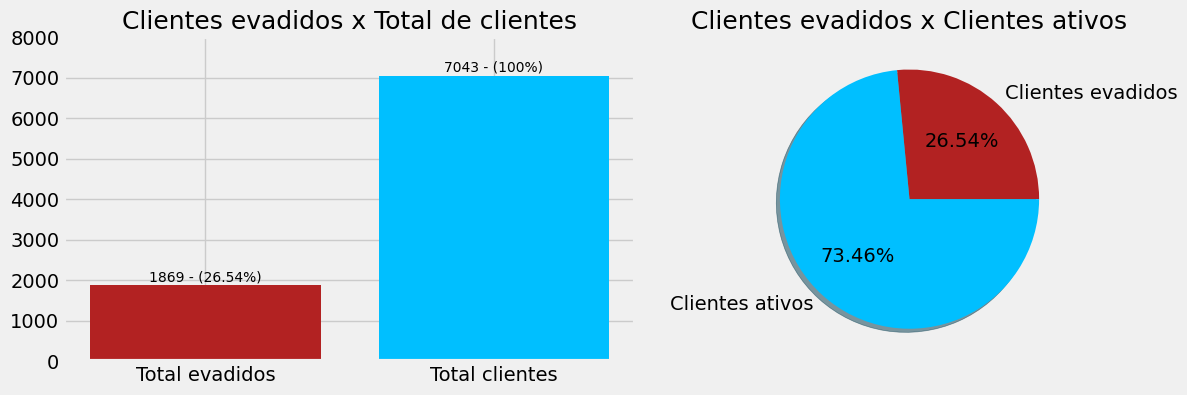

In [92]:
import matplotlib.pyplot as plt

total_clientes = dados_normalizados['Churn'].count()
total_evadidos = dados_normalizados['Churn'].sum()
percentual_evadidos = round(dados_normalizados['Churn'].sum() / dados_normalizados['Churn'].count() * 100, 2)

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(1, 2, figsize=(13, 4))
  fig.subplots_adjust(wspace = -0.02)
  ax[0].bar(['Total evadidos', 'Total clientes'], [total_evadidos, total_clientes], color=['firebrick', 'deepskyblue'])
  ax[0].set_title('Clientes evadidos x Total de clientes', loc='center', fontsize=18)
  ax[0].text(0, total_evadidos + 200, f'{str(total_evadidos)} - ({percentual_evadidos}%)', color='black', fontsize=10, ha='center', va='center')
  ax[0].text(1, total_clientes + 200, f'{str(total_clientes)} - (100%)', color='black', fontsize=10, ha='center', va='center')
  ax[0].set_ylim(0, 8000)

  ax[1].pie([total_evadidos, total_clientes - total_evadidos],
            labels=['Clientes evadidos', 'Clientes ativos'],
            autopct='%.2f%%',
            colors=['firebrick', 'deepskyblue'],
            shadow=True)
  ax[1].set_title('Clientes evadidos x Clientes ativos', loc='center', fontsize=18)

  plt.show()

In [93]:
# criando um dataframe apenas dos clientes evadidos
dados_churn = dados_normalizados.query('Churn == 1')
dados_churn.describe()

,Churn,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Seguranca_Online,Possui_Backup,Possui_Protecao,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Fatura_Online,Total_Mes,Total_Gasto,Custo_Diario
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.749064,74.441332,1531.796094,2.481450
std,0.0,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.433668,24.666053,1890.822994,0.822287
min,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.630000
25%,1.0,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.870000
50%,1.0,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.650000,703.550000,2.660000
75%,1.0,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,3.940000


In [94]:
dados_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7039
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cliente_ID               1869 non-null   object 
 1   Churn                    1869 non-null   int64  
 2   Genero                   1869 non-null   object 
 3   Eh_Idoso                 1869 non-null   int64  
 4   Possui_Parceiro          1869 non-null   int64  
 5   Possui_Dependentes       1869 non-null   int64  
 6   Meses_Contrato           1869 non-null   int64  
 7   Possui_Telefone          1869 non-null   int64  
 8   Possui_Varias_Linhas     1869 non-null   int64  
 9   Possui_Internet          1869 non-null   object 
 10  Possui_Seguranca_Online  1869 non-null   int64  
 11  Possui_Backup            1869 non-null   int64  
 12  Possui_Protecao          1869 non-null   int64  
 13  Possui_Suporte_TV        1869 non-null   int64  
 14  Possui_TV_Cabo           1869

In [95]:
# Visões por genero, senioridade, parceiro, dependentes, tipo de contrato, formas de pagamento, pelos serviços e se recebe ou não fatura online
dados_genero = dados_churn.groupby('Genero')['Churn'].sum()
dados_genero

,Churn
Genero,
Female,939
Male,930


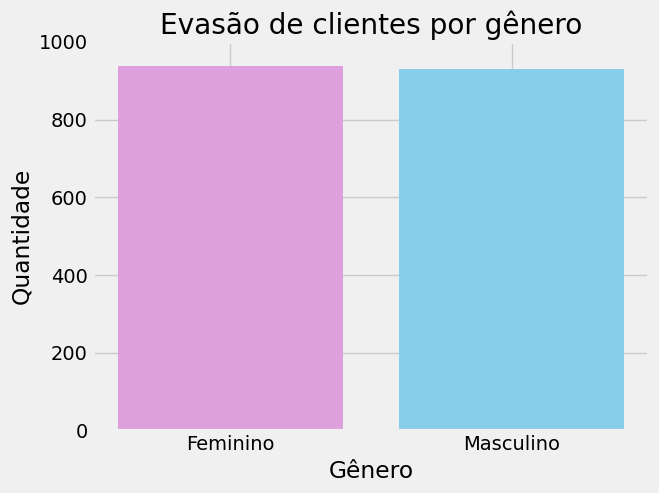

In [96]:
# dados por genero
with plt.style.context('fivethirtyeight'):
  plt.bar(['Feminino', 'Masculino'], dados_genero, color=['plum', 'skyblue'])
  plt.title('Evasão de clientes por gênero')
  plt.xlabel('Gênero')
  plt.ylabel('Quantidade')
  plt.ylim(0, 1000)
  plt.show()

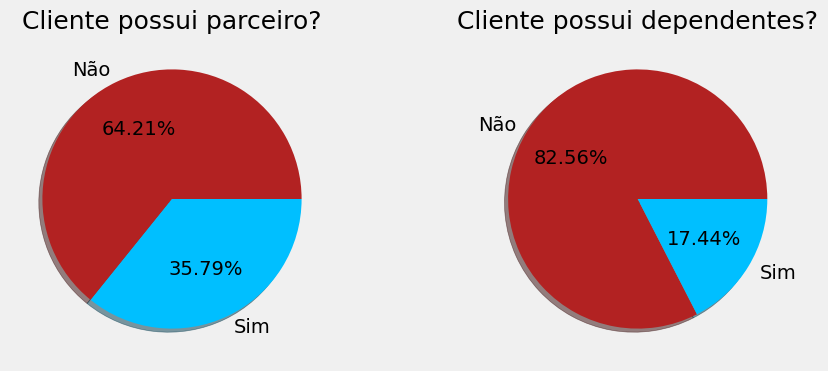

In [97]:
# dados de perfil familiar

dados_parceiros = dados_churn.groupby('Possui_Parceiro')['Churn'].count()
dados_dependentes = dados_churn.groupby('Possui_Dependentes')['Churn'].count()

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(1, 2, figsize=(13, 4))
  fig.subplots_adjust(wspace = -0.3)
  ax[0].pie(dados_parceiros,
            labels=['Não', 'Sim'],
            autopct='%.2f%%',
            colors=['firebrick', 'deepskyblue'],
            shadow=True)
  ax[0].set_title('Cliente possui parceiro?', loc='center', fontsize=18)

  ax[1].pie(dados_dependentes,
            labels=['Não', 'Sim'],
            autopct='%.2f%%',
            colors=['firebrick', 'deepskyblue'],
            shadow=True)
  ax[1].set_title('Cliente possui dependentes?', loc='center', fontsize=18)

  plt.show()

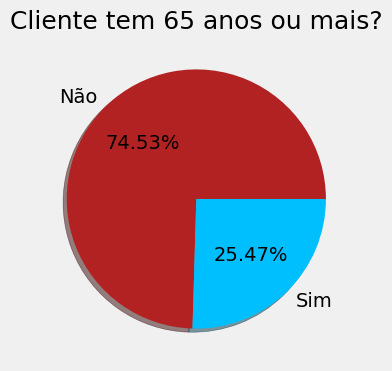

In [98]:
# dados por senioridade
dados_idoso = dados_churn.groupby('Eh_Idoso')['Churn'].sum()

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(13, 4))
  ax.pie(dados_idoso,
         labels=['Não', 'Sim'],
         autopct='%.2f%%',
         colors=['firebrick', 'deepskyblue'],
         shadow=True)
  ax.set_title('Cliente tem 65 anos ou mais?', loc='center', fontsize=18)

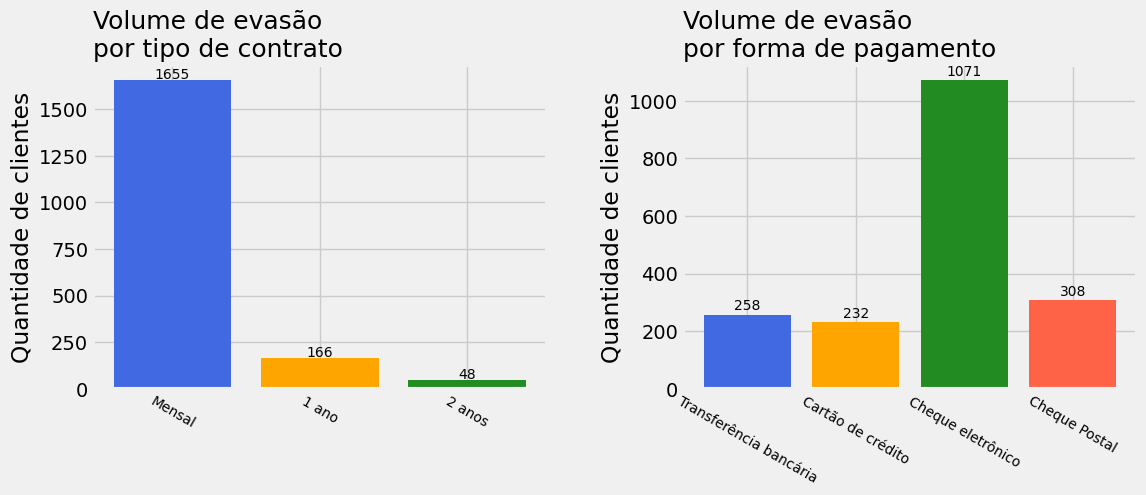

In [99]:
# dados por tipo de contrato e formas de pagamento
dados_contrato = dados_churn.groupby('Tipo_Contrato')['Churn'].sum()
dados_pagamento = dados_churn.groupby('Forma_Pagamento')['Churn'].sum()

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  fig.subplots_adjust(wspace = 0.3)
  ax[0].bar(['Mensal', '1 ano', '2 anos'], dados_contrato, color=['royalblue', 'orange', 'forestgreen'])
  ax[0].set_title('Volume de evasão\npor tipo de contrato', loc='left', fontsize=18)
  ax[0].set_ylabel('Quantidade de clientes')
  ax[0].xaxis.set_tick_params(labelsize=10, rotation=-30)
  for i, item in enumerate(dados_contrato):
    ax[0].text(i, dados_contrato.iloc[i] + 30, str(dados_contrato.iloc[i]), color='black', fontsize=10, ha='center', va='center')

  ax[1].bar(['Transferência bancária', 'Cartão de crédito', 'Cheque eletrônico', 'Cheque Postal'], dados_pagamento, color=['royalblue', 'orange', 'forestgreen', 'tomato'])
  ax[1].set_title('Volume de evasão\npor forma de pagamento', loc='left', fontsize=18)
  ax[1].set_ylabel('Quantidade de clientes')
  ax[1].xaxis.set_tick_params(labelsize=10, rotation=-30)
  for i, item in enumerate(dados_pagamento):
    ax[1].text(i, dados_pagamento.iloc[i] + 30, str(dados_pagamento.iloc[i]), color='black', fontsize=10, ha='center', va='center')

  plt.show()

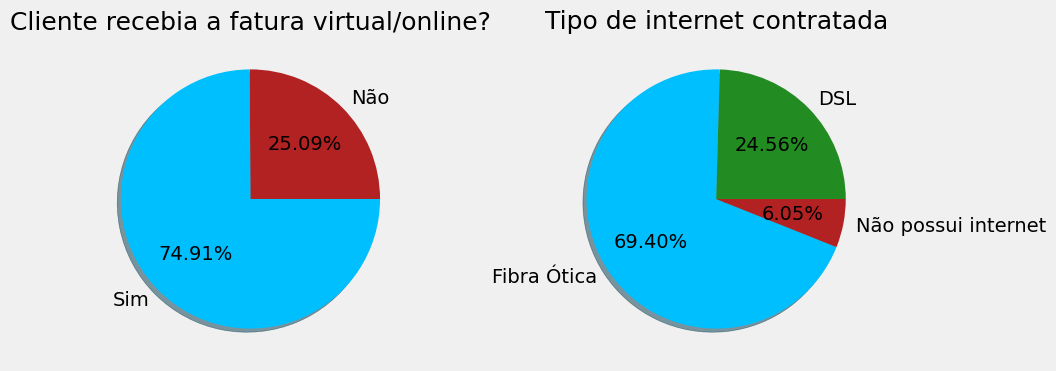

In [100]:
# dados pelos serviços
dados_fatura = dados_churn.groupby('Fatura_Online')['Churn'].count()
dados_tipo_internet = dados_churn.groupby('Possui_Internet')['Churn'].count()

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(1, 2, figsize=(13, 4))
  fig.subplots_adjust(wspace = -0.3)
  ax[0].pie(dados_fatura,
         labels=['Não', 'Sim'],
         autopct='%.2f%%',
         colors=['firebrick', 'deepskyblue'],
         shadow=True)
  ax[0].set_title('Cliente recebia a fatura virtual/online?', loc='center', fontsize=18)

  ax[1].pie(dados_tipo_internet,
         labels=['DSL', 'Fibra Ótica', 'Não possui internet'],
         autopct='%.2f%%',
         colors=['forestgreen','deepskyblue','firebrick'],
         shadow=True)
  ax[1].set_title('Tipo de internet contratada', loc='center', fontsize=18)

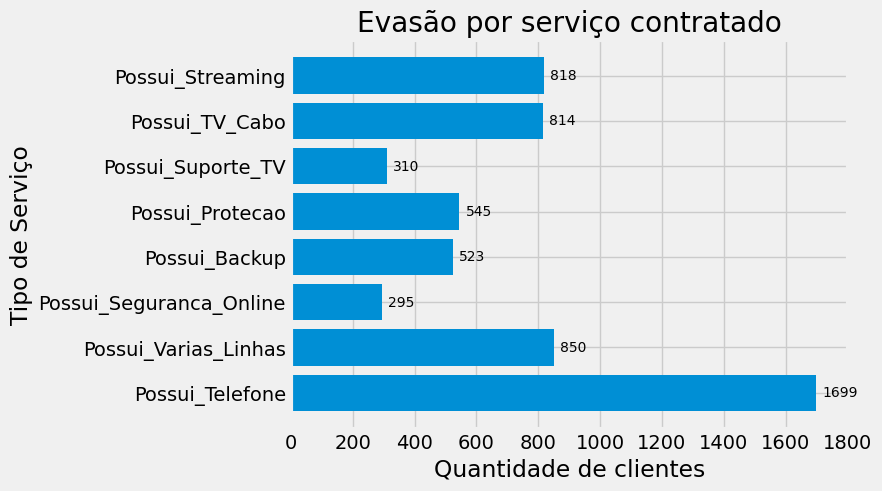

In [101]:
# dados pelos serviços contratados
servicos = ['Possui_Telefone', 'Possui_Varias_Linhas',
            'Possui_Seguranca_Online', 'Possui_Backup', 'Possui_Protecao',
            'Possui_Suporte_TV', 'Possui_TV_Cabo', 'Possui_Streaming']

dados_servicos = dados_churn[servicos].sum()

with plt.style.context('fivethirtyeight'):
  plt.barh(servicos, dados_servicos)
  plt.title('Evasão por serviço contratado')
  plt.ylabel('Tipo de Serviço')
  plt.xlabel('Quantidade de clientes')
  plt.xlim(0, 1800)

  for i, var in enumerate(dados_servicos):
    plt.text(var + 20, i, str(var), color='black', fontsize=10, ha='left', va='center')

  plt.show()

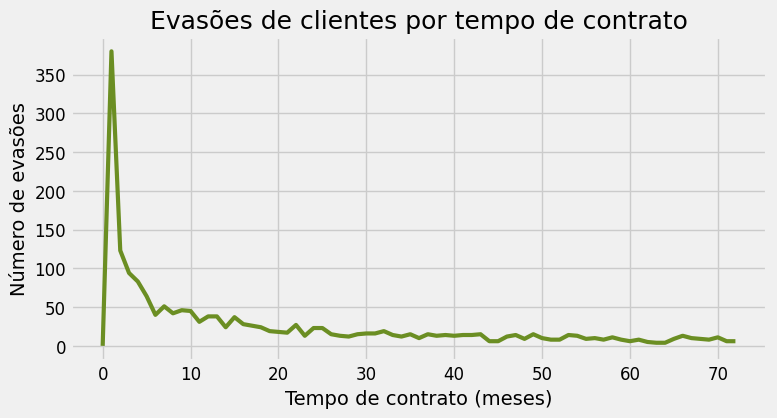

In [102]:
# Analise com base nos dados numéricos (Meses_Contrato, Total_Mes	Total_Gasto)
tempo_medio_contrato = dados_normalizados.groupby('Meses_Contrato')['Churn'].sum()
tempo_medio_contrato

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(tempo_medio_contrato, lw=3, color='olivedrab')
  ax.set_title('Evasões de clientes por tempo de contrato', fontsize=18, loc='center')
  ax.set_xlabel('Tempo de contrato (meses)', fontsize=14)
  ax.set_ylabel('Número de evasões', fontsize=14)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)
  plt.show()


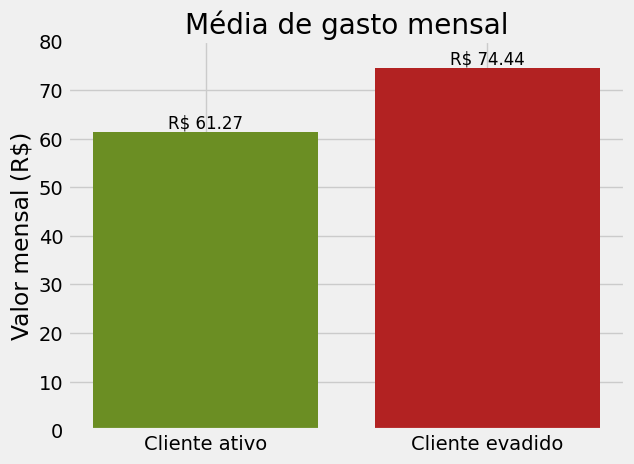

In [103]:
# Analise com base nos dados numéricos (Meses_Contrato, Total_Mes	Total_Gasto)
media_gasto_mes = dados_normalizados.groupby('Churn')['Total_Mes'].mean()

with plt.style.context('fivethirtyeight'):
  plt.bar(['Cliente ativo', 'Cliente evadido'], media_gasto_mes, color=['olivedrab', 'firebrick'])
  plt.title('Média de gasto mensal')
  plt.xlabel('')
  plt.ylabel('Valor mensal (R$)')
  plt.text(0, media_gasto_mes.iloc[0] + 2, f'R$ {str(round(media_gasto_mes.iloc[0], 2))}', color='black', fontsize=12, ha='center', va='center')
  plt.text(1, media_gasto_mes.iloc[1] + 2, f'R$ {str(round(media_gasto_mes.iloc[1], 2))}', color='black', fontsize=12, ha='center', va='center')
  plt.ylim(0, 80)
  plt.show()

In [104]:
# Quantidade de serviços contratados
dados_normalizados['Qtde_Servicos_Contratados'] = dados_normalizados[servicos].sum(axis=1)
dados_normalizados['Qtde_Servicos_Contratados'] = dados_normalizados['Qtde_Servicos_Contratados'] + 1 if str(dados_normalizados['Possui_Internet']).upper() != 'NO' else dados_normalizados['Qtde_Servicos_Contratados']
dados_normalizados.head()

,Cliente_ID,Churn,Genero,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Internet,...,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mes,Total_Gasto,Custo_Diario,Qtde_Servicos_Contratados
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,5
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,3
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,6
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,4


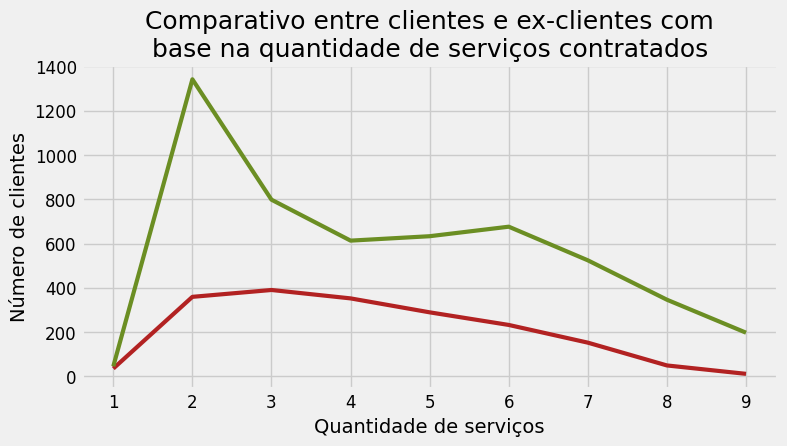

In [105]:
dados_evadidos_servicos = dados_normalizados.query('Churn == 1').groupby('Qtde_Servicos_Contratados').count()['Churn']
dados_clientes_servicos = dados_normalizados.query('Churn == 0').groupby('Qtde_Servicos_Contratados').count()['Churn']

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(dados_evadidos_servicos, lw=3, color='firebrick')
  ax.plot(dados_clientes_servicos, lw=3, color='olivedrab')
  ax.set_title('Comparativo entre clientes e ex-clientes com\nbase na quantidade de serviços contratados', fontsize=18, loc='center')
  ax.set_xlabel('Quantidade de serviços', fontsize=14)
  ax.set_ylabel('Número de clientes', fontsize=14)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)
  plt.show()

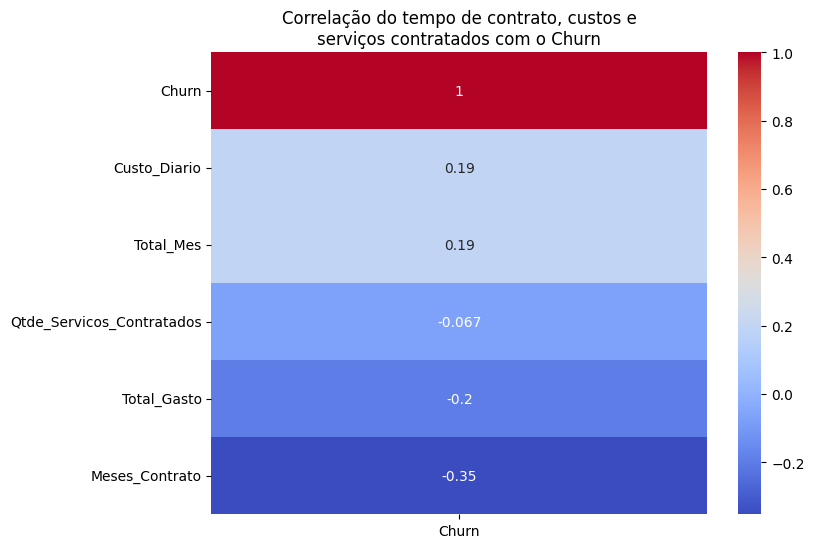

In [106]:
import seaborn as sns

# Selecionar variáveis numéricas + Churn
numericas = ['Meses_Contrato', 'Total_Mes', 'Total_Gasto', 'Custo_Diario', 'Qtde_Servicos_Contratados', 'Churn']
df_num = dados_normalizados[numericas].copy()

# Calcular correlação
corr = df_num.corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação do tempo de contrato, custos e\nserviços contratados com o Churn')
plt.show()

#📄Relatorio Final

# Introdução e Contexto do Problema

**Telecom X - Análise de Evasão de Clientes**

Fui contrato como assistente de análise de dados na Telecom X e farei parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Meu desafio foi coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir dessa análise, os demais colegas da  equipe de Data Science poderão avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

# Limpeza e Tratamento dos dados

A base de dados foi disponibilizada em formato .json, utilizei da biblioteca "Pandas" do Python para realizar a importação da base, a base em seu formato "cru", continha 6 colunas e 7267 registros.

Realizei uma análise prévia dessa base, para entender o que era cada um das colunas e quais as informações continham nelas, após isso, cada uma dessas colunas tinham dicionários dentro delas, com mais dados, que seria importantes para as análises.

Abri cada uma das colunas com a função de normalizar json do Pandas, e validei a existencia de dados nulos e vazios, que poderiam atrapalhar a análise dos dados.

Foram localizados 224 registros onde a informação da evasão dos clientes estava vazia, sendo assim, essas 224 linhas foram removidas da análise, sobrando um total de 7043 registros.

Para facilitar o processo de análise, realizei a extração das colunas de dicionários em novos dataframes e juntei todos os dataframes em uma ultima base normalizada, sendo essa, contendo agora 21 colunas de dados.

Por fim tratei, converti e padronizei os dados conforme os tipos, dados boleanos, foram transformatos em BIT (0 e 1), os dados numéricos em "int" ou "float", conforme o seus objetivos, fiz isso utilizando a biblioteca NumPy e Pandas, e renomei as colunas em nomes amigáveis, para facilitar o entendimento no futuro.

# Análise Exploratória dos dados

Para a análise dos dados, comecei gerando informações de média, mediana, desvio padrão e métricas quantitativas, dos dados numéricos, para que esses números possam ajudar a ter já algumas impressões do problema.

Comparei o volume de clientes evadidos com os que ainda são clientes, e após isso, gerei métricas de todas as colunas numéricas apenas olhando os dados dos clientes evadidos.

Por fim, gerei diversos gráficos tanto categóricos quanto numéricos, com o objetivo de visualizar pontos que justifiquem esse volume de evasão.

# Conclusões e Insights

Após todo esse processo, vou resumir abaixo alguns pontos quais achei revelantes para a análise:

*   Cerca de 26,5% é o volume de evasão de clientes

*   O volume de clientes do sexo feminino e masculino é muito próximo

*   A quantidade de clientes que possuem parceiros ou dependentes é baixo, 35% e 17%

*   Apenas 25% dessa massa tem mais de 65 anos

*   A grande maioria desses clientes possuiam o tipo de contrato "mensal"

*   Cerca de 65% realizavam o pagamento através de "cheque eletrônico"

*   75% recebiam a fatura de forma virtual

*   70% possuiam o tipo de internet "fibra ótica"

*   Quase 100% dos clientes tinham o serviço de telefonia e metade desses tambem tinham os serviços de streaming, TV a cabo e /ou tinham mais de uma linha

*   A grande maioria dos clientes cancelaram o contrato os primeiros 3 a 4 meses de contrato apenas

*   Esses clientes possuiam uma média de gasto mensal com os serviços superior aos clientes ativos

*   A grande maioria dos clientes ativos possuem de 2 a 3 tipos de serviços contratados, já olhando os clientes evadidos, isso varia de 2 a 5 serviços distintos

*   As correlações mais fortes com o churn são os custos com os serviços e a quantidade de serviços contratados

# Recomendações

Com base nos itens destacados acima, seguem as minhas sugestões a Telecom X dos pontos a serem revistos por eles, com o objetivo de diminuir as evasões de clientes e até possíveis ações para captação de novos clientes.

Um volume grande dos clientes do churn são pessoas solteiras, sem dependentes e com menos de 65 anos, o ritmo de vida desse perfil é um pouco mais acelerado, muitas vezes estão focados mais em diversão, contato físico cara a cara, amizades, trabalho, e despriorizam a vida remota, então telefone, internet, TV, etc, acabam tendo uma importancia menor no seu dia a dia, eu recomendaria uma ação de venda dos produtos voltada a casais e famílias com filhos, pois esse perfil consome mais esses serviços.

A grande maioria desses clientes possuiam o plano mensal, logo o vinculo entre cliente e empresa é mais frágil, ja que o cliente só possui o vinculo com a empresa ali naquele mês em que o serviço foi prestado e o pagamento efetuado, eu sugiro tentar vender planos anuais por um valor final mais atrativo, pois a empresa tem um período maior para fidelizar o cliente.

Uma boa massa dos clientes efetuavam o pagamento através do cheque eletrônico, sugiro analisar o volume de problemas relacionados a essa forma de pagamento, caso tenha, pois problemas recorrentes com isso pode frustrar a experiência do cliente.

Cerca de 75% recebiam a fatura digital, minha sugestão é igual a acima, verificar possiveis problemas com esse serviço, pois pode afetar a experiência do cliente.

Boa parte dos clientes possuiam o serviço de fibra ótica, será que esse serviço estava atendendo as necessidades dos clientes? Qual o volume de incidencia de falhas?

Quase 100% dos clientes tinham o serviço de telefonia e metade desses também tinham os serviços de streaming, TV a cabo e/ou tinham mais de uma linha, qual a qualidade desses serviços? Os clientes estavam satisfeitos?

A grande maioria dos clientes cancelaram o contrato os primeiros meses de uso dos serviços, evidenciando uma possível insatisfação com os produtos ou com o serviço prestado, além de que tinham uma média superior de gasto comparado aos clientes ainda ativos e possuiam uma quantidade maior de serviços contratados, sugiro bastante uma revisão da qualidade dos serviços, a criação de uma monitoria do uso e funcionamento, além de planos de ação para contornar possíveis falhas.

De forma resumida, as ações são:

*   Focar as novas vendas para famílias

*   Oferecer planos anuais com opções mais atrativas de serviços ou preços,  vinculadas ao plano

*   Analisar a prestação dos serviços de pagamento com cheque online e envio de faturas por e-mail

*   Verificar a qualidade do serviço de fibra ótica

*   Verificar a qualidade dos serviços de telefonia, streaming e TV

*   Criação de uma monitoria da disponibilidade dos serviços

*   Planos de ação para contornar possíveis falhas